In [115]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy
import os
import tensorflow as tf
%matplotlib inline

In [116]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

df_pre = pd.read_csv('../data/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[ : , (0,1,2,3,4,5,6,7,8,9,10,12)]
Y = dataset[ : , 11]
#11번째열 지우고 저장


In [117]:
Y

array([6., 6., 6., 5., 8., 5., 6., 6., 6., 6., 7., 6., 7., 5., 7., 7., 6.,
       6., 6., 6., 6., 6., 7., 5., 6., 6., 5., 6., 4., 6., 5., 6., 7., 7.,
       6., 5., 6., 7., 6., 5., 4., 5., 5., 6., 5., 4., 6., 5., 5., 6., 6.,
       6., 6., 5., 5., 6., 7., 6., 6., 5., 7., 8., 6., 5., 7., 6., 6., 5.,
       6., 7., 5., 5., 4., 5., 6., 5., 6., 7., 6., 6., 6., 6., 6., 4., 6.,
       5., 6., 5., 4., 7., 6., 7., 6., 6., 7., 6., 8., 6., 5., 7., 8., 5.,
       5., 5., 6., 7., 6., 6., 6., 5., 5., 6., 5., 6., 6., 6., 5., 6., 8.,
       7., 5., 7., 7., 3., 6., 5., 6., 7., 5., 7., 6., 6., 5., 5., 6., 6.,
       6., 6., 6., 6., 7., 6., 6., 5., 5., 7., 5., 6., 6., 6., 7., 6., 6.,
       7., 5., 7., 5., 6., 5., 6., 8., 6., 6., 8., 6., 7., 6., 6., 6., 5.,
       7., 5., 7., 6., 7., 6., 4., 6., 6., 7., 4., 6., 8., 7., 5., 6., 6.,
       6., 6., 8., 7., 7., 6., 6., 6., 6., 7., 6., 6., 5., 5., 7., 7., 5.,
       6., 6., 5., 6., 6., 4., 7., 7., 6., 5., 5., 5., 5., 6., 6., 6., 6.,
       7., 6., 5., 5., 6.

In [98]:
from keras.utils import np_utils

Y = np_utils.to_categorical(Y, 11)

In [99]:
Y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [112]:
# 모델의 설정
model = Sequential()
model.add(Dense(55,  input_dim=12, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(9, activation='softplus'))
model.add(Dense(11, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [113]:
import matplotlib.pyplot as plt

# 모델 저장 폴더 설정
MODEL_DIR = 'model_1/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath="model_1/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 저장 조건 설정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=8000, batch_size=500)

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


Train on 653 samples, validate on 322 samples
Epoch 1/8000
653/653 [==============================] - 1s 931us/step - loss: 8.1576 - acc: 0.0046 - val_loss: 7.6511 - val_acc: 0.0000e+00
Epoch 2/8000
653/653 [==============================] - 0s 6us/step - loss: 7.2217 - acc: 0.0015 - val_loss: 6.6988 - val_acc: 0.0000e+00
Epoch 3/8000
653/653 [==============================] - 0s 8us/step - loss: 6.3019 - acc: 0.0000e+00 - val_loss: 5.9629 - val_acc: 0.0000e+00
Epoch 4/8000
653/653 [==============================] - 0s 9us/step - loss: 5.6053 - acc: 0.0061 - val_loss: 5.5475 - val_acc: 0.3540
Epoch 5/8000
653/653 [==============================] - 0s 8us/step - loss: 5.2094 - acc: 0.3767 - val_loss: 5.2783 - val_acc: 0.4006
Epoch 6/8000
653/653 [==============================] - 0s 8us/step - loss: 4.9553 - acc: 0.4150 - val_loss: 5.0584 - val_acc: 0.4286
Epoch 7/8000
653/653 [==============================] - 0s 9us/step - loss: 4.7505 - acc: 0.4273 - val_loss: 4.8653 - val_acc: 0.431

653/653 [==============================] - 0s 9us/step - loss: 1.2917 - acc: 0.4533 - val_loss: 1.2982 - val_acc: 0.4503
Epoch 122/8000
653/653 [==============================] - 0s 8us/step - loss: 1.2899 - acc: 0.4548 - val_loss: 1.2976 - val_acc: 0.4472
Epoch 123/8000
653/653 [==============================] - 0s 6us/step - loss: 1.2874 - acc: 0.4533 - val_loss: 1.2977 - val_acc: 0.4472
Epoch 124/8000
653/653 [==============================] - 0s 8us/step - loss: 1.2858 - acc: 0.4533 - val_loss: 1.2947 - val_acc: 0.4472
Epoch 125/8000
653/653 [==============================] - 0s 11us/step - loss: 1.2842 - acc: 0.4518 - val_loss: 1.2909 - val_acc: 0.4472
Epoch 126/8000
653/653 [==============================] - 0s 9us/step - loss: 1.2813 - acc: 0.4518 - val_loss: 1.2892 - val_acc: 0.4503
Epoch 127/8000
653/653 [==============================] - 0s 8us/step - loss: 1.2796 - acc: 0.4548 - val_loss: 1.2876 - val_acc: 0.4503
Epoch 128/8000
653/653 [==============================] - 0s 9

Epoch 181/8000
653/653 [==============================] - 0s 9us/step - loss: 1.2230 - acc: 0.4533 - val_loss: 1.2376 - val_acc: 0.4441
Epoch 182/8000
653/653 [==============================] - 0s 9us/step - loss: 1.2252 - acc: 0.4502 - val_loss: 1.2383 - val_acc: 0.4441
Epoch 183/8000
653/653 [==============================] - 0s 6us/step - loss: 1.2231 - acc: 0.4533 - val_loss: 1.2431 - val_acc: 0.4379
Epoch 184/8000
653/653 [==============================] - 0s 9us/step - loss: 1.2224 - acc: 0.4518 - val_loss: 1.2435 - val_acc: 0.4286
Epoch 185/8000
653/653 [==============================] - 0s 9us/step - loss: 1.2228 - acc: 0.4548 - val_loss: 1.2429 - val_acc: 0.4286
Epoch 186/8000
653/653 [==============================] - 0s 6us/step - loss: 1.2228 - acc: 0.4609 - val_loss: 1.2421 - val_acc: 0.4286
Epoch 187/8000
653/653 [==============================] - 0s 9us/step - loss: 1.2214 - acc: 0.4518 - val_loss: 1.2403 - val_acc: 0.4379
Epoch 188/8000
653/653 [========================

653/653 [==============================] - 0s 9us/step - loss: 1.1657 - acc: 0.4487 - val_loss: 1.1896 - val_acc: 0.4783
Epoch 302/8000
653/653 [==============================] - 0s 6us/step - loss: 1.1655 - acc: 0.4472 - val_loss: 1.1895 - val_acc: 0.4814
Epoch 303/8000
653/653 [==============================] - 0s 9us/step - loss: 1.1637 - acc: 0.4548 - val_loss: 1.1888 - val_acc: 0.4752
Epoch 304/8000
653/653 [==============================] - 0s 9us/step - loss: 1.1635 - acc: 0.4594 - val_loss: 1.1886 - val_acc: 0.4658
Epoch 305/8000
653/653 [==============================] - 0s 8us/step - loss: 1.1622 - acc: 0.4671 - val_loss: 1.1881 - val_acc: 0.4658
Epoch 306/8000
653/653 [==============================] - 0s 9us/step - loss: 1.1621 - acc: 0.4686 - val_loss: 1.1902 - val_acc: 0.4658
Epoch 307/8000
653/653 [==============================] - 0s 9us/step - loss: 1.1621 - acc: 0.4564 - val_loss: 1.1878 - val_acc: 0.4876
Epoch 308/8000
653/653 [==============================] - 0s 6u

653/653 [==============================] - 0s 9us/step - loss: 1.1343 - acc: 0.4824 - val_loss: 1.1719 - val_acc: 0.4689
Epoch 362/8000
653/653 [==============================] - 0s 9us/step - loss: 1.1375 - acc: 0.4763 - val_loss: 1.1702 - val_acc: 0.4658
Epoch 363/8000
653/653 [==============================] - 0s 8us/step - loss: 1.1361 - acc: 0.4778 - val_loss: 1.1635 - val_acc: 0.4752
Epoch 364/8000
653/653 [==============================] - 0s 9us/step - loss: 1.1337 - acc: 0.4855 - val_loss: 1.1626 - val_acc: 0.4907
Epoch 365/8000
653/653 [==============================] - 0s 6us/step - loss: 1.1354 - acc: 0.4763 - val_loss: 1.1666 - val_acc: 0.5062
Epoch 366/8000
653/653 [==============================] - 0s 8us/step - loss: 1.1371 - acc: 0.4655 - val_loss: 1.1675 - val_acc: 0.5031
Epoch 367/8000
653/653 [==============================] - 0s 11us/step - loss: 1.1350 - acc: 0.4717 - val_loss: 1.1623 - val_acc: 0.4938
Epoch 368/8000
653/653 [==============================] - 0s 8

653/653 [==============================] - 0s 9us/step - loss: 1.1136 - acc: 0.4900 - val_loss: 1.1556 - val_acc: 0.5124
Epoch 422/8000
653/653 [==============================] - 0s 6us/step - loss: 1.1136 - acc: 0.5054 - val_loss: 1.1573 - val_acc: 0.5280
Epoch 423/8000
653/653 [==============================] - 0s 11us/step - loss: 1.1161 - acc: 0.5069 - val_loss: 1.1578 - val_acc: 0.5186
Epoch 424/8000
653/653 [==============================] - 0s 9us/step - loss: 1.1127 - acc: 0.4946 - val_loss: 1.1566 - val_acc: 0.5124
Epoch 425/8000
653/653 [==============================] - 0s 8us/step - loss: 1.1104 - acc: 0.4900 - val_loss: 1.1549 - val_acc: 0.5093
Epoch 426/8000
653/653 [==============================] - 0s 11us/step - loss: 1.1104 - acc: 0.4824 - val_loss: 1.1548 - val_acc: 0.5031
Epoch 427/8000
653/653 [==============================] - 0s 9us/step - loss: 1.1132 - acc: 0.4855 - val_loss: 1.1555 - val_acc: 0.5124
Epoch 428/8000
653/653 [==============================] - 0s 

653/653 [==============================] - 0s 12us/step - loss: 1.0745 - acc: 0.5130 - val_loss: 1.1353 - val_acc: 0.5342
Epoch 542/8000
653/653 [==============================] - 0s 8us/step - loss: 1.0791 - acc: 0.5161 - val_loss: 1.1360 - val_acc: 0.5311
Epoch 543/8000
653/653 [==============================] - 0s 11us/step - loss: 1.0770 - acc: 0.5038 - val_loss: 1.1396 - val_acc: 0.5186
Epoch 544/8000
653/653 [==============================] - 0s 11us/step - loss: 1.0786 - acc: 0.5176 - val_loss: 1.1335 - val_acc: 0.5093
Epoch 545/8000
653/653 [==============================] - 0s 6us/step - loss: 1.0727 - acc: 0.5130 - val_loss: 1.1441 - val_acc: 0.5248
Epoch 546/8000
653/653 [==============================] - 0s 11us/step - loss: 1.0764 - acc: 0.5069 - val_loss: 1.1360 - val_acc: 0.5217
Epoch 547/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0735 - acc: 0.5191 - val_loss: 1.1335 - val_acc: 0.5248
Epoch 548/8000
653/653 [==============================] - 0

653/653 [==============================] - 0s 9us/step - loss: 1.0588 - acc: 0.5222 - val_loss: 1.1294 - val_acc: 0.5062
Epoch 662/8000
653/653 [==============================] - 0s 6us/step - loss: 1.0621 - acc: 0.5237 - val_loss: 1.1440 - val_acc: 0.4969
Epoch 663/8000
653/653 [==============================] - 0s 11us/step - loss: 1.0712 - acc: 0.5207 - val_loss: 1.1349 - val_acc: 0.5093
Epoch 664/8000
653/653 [==============================] - 0s 6us/step - loss: 1.0591 - acc: 0.5314 - val_loss: 1.1433 - val_acc: 0.4783
Epoch 665/8000
653/653 [==============================] - 0s 8us/step - loss: 1.0747 - acc: 0.5283 - val_loss: 1.1514 - val_acc: 0.4907
Epoch 666/8000
653/653 [==============================] - 0s 11us/step - loss: 1.0670 - acc: 0.5161 - val_loss: 1.1408 - val_acc: 0.5000
Epoch 667/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0586 - acc: 0.5222 - val_loss: 1.1312 - val_acc: 0.4938
Epoch 668/8000
653/653 [==============================] - 0s 

653/653 [==============================] - 0s 9us/step - loss: 1.0437 - acc: 0.5314 - val_loss: 1.1277 - val_acc: 0.5155
Epoch 722/8000
653/653 [==============================] - 0s 8us/step - loss: 1.0430 - acc: 0.5314 - val_loss: 1.1266 - val_acc: 0.5186
Epoch 723/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0450 - acc: 0.5314 - val_loss: 1.1257 - val_acc: 0.5031
Epoch 724/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0463 - acc: 0.5253 - val_loss: 1.1242 - val_acc: 0.5155
Epoch 725/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0412 - acc: 0.5345 - val_loss: 1.1265 - val_acc: 0.5280
Epoch 726/8000
653/653 [==============================] - 0s 8us/step - loss: 1.0420 - acc: 0.5375 - val_loss: 1.1253 - val_acc: 0.5311
Epoch 727/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0469 - acc: 0.5375 - val_loss: 1.1268 - val_acc: 0.5155
Epoch 728/8000
653/653 [==============================] - 0s 6u

653/653 [==============================] - 0s 6us/step - loss: 1.0337 - acc: 0.5436 - val_loss: 1.1227 - val_acc: 0.5186
Epoch 782/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0374 - acc: 0.5314 - val_loss: 1.1214 - val_acc: 0.5186
Epoch 783/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0384 - acc: 0.5482 - val_loss: 1.1206 - val_acc: 0.5124
Epoch 784/8000
653/653 [==============================] - 0s 8us/step - loss: 1.0374 - acc: 0.5482 - val_loss: 1.1286 - val_acc: 0.5155
Epoch 785/8000
653/653 [==============================] - 0s 11us/step - loss: 1.0371 - acc: 0.5299 - val_loss: 1.1167 - val_acc: 0.5280
Epoch 786/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0348 - acc: 0.5421 - val_loss: 1.1220 - val_acc: 0.5217
Epoch 787/8000
653/653 [==============================] - 0s 8us/step - loss: 1.0423 - acc: 0.5391 - val_loss: 1.1340 - val_acc: 0.5311
Epoch 788/8000
653/653 [==============================] - 0s 9

653/653 [==============================] - 0s 6us/step - loss: 1.0196 - acc: 0.5605 - val_loss: 1.1160 - val_acc: 0.5373
Epoch 902/8000
653/653 [==============================] - 0s 6us/step - loss: 1.0225 - acc: 0.5391 - val_loss: 1.1171 - val_acc: 0.5342
Epoch 903/8000
653/653 [==============================] - 0s 14us/step - loss: 1.0201 - acc: 0.5436 - val_loss: 1.1215 - val_acc: 0.5248
Epoch 904/8000
653/653 [==============================] - 0s 6us/step - loss: 1.0193 - acc: 0.5406 - val_loss: 1.1249 - val_acc: 0.5248
Epoch 905/8000
653/653 [==============================] - 0s 12us/step - loss: 1.0180 - acc: 0.5406 - val_loss: 1.1197 - val_acc: 0.5373
Epoch 906/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0222 - acc: 0.5513 - val_loss: 1.1282 - val_acc: 0.4969
Epoch 907/8000
653/653 [==============================] - 0s 6us/step - loss: 1.0215 - acc: 0.5467 - val_loss: 1.1374 - val_acc: 0.4876
Epoch 908/8000
653/653 [==============================] - 0s 

653/653 [==============================] - 0s 9us/step - loss: 1.0076 - acc: 0.5513 - val_loss: 1.1173 - val_acc: 0.5404
Epoch 1022/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0097 - acc: 0.5375 - val_loss: 1.1175 - val_acc: 0.5311
Epoch 1023/8000
653/653 [==============================] - 0s 6us/step - loss: 1.0091 - acc: 0.5452 - val_loss: 1.1308 - val_acc: 0.5124
Epoch 1024/8000
653/653 [==============================] - 0s 11us/step - loss: 1.0113 - acc: 0.5452 - val_loss: 1.1185 - val_acc: 0.5217
Epoch 1025/8000
653/653 [==============================] - 0s 8us/step - loss: 1.0132 - acc: 0.5559 - val_loss: 1.1198 - val_acc: 0.5186
Epoch 1026/8000
653/653 [==============================] - 0s 8us/step - loss: 1.0085 - acc: 0.5544 - val_loss: 1.1406 - val_acc: 0.5155
Epoch 1027/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0165 - acc: 0.5482 - val_loss: 1.1207 - val_acc: 0.5342
Epoch 1028/8000
653/653 [==============================]

Epoch 1081/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0101 - acc: 0.5544 - val_loss: 1.1168 - val_acc: 0.5186
Epoch 1082/8000
653/653 [==============================] - 0s 11us/step - loss: 1.0018 - acc: 0.5666 - val_loss: 1.1469 - val_acc: 0.4969
Epoch 1083/8000
653/653 [==============================] - 0s 8us/step - loss: 1.0209 - acc: 0.5406 - val_loss: 1.1154 - val_acc: 0.5248
Epoch 1084/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0017 - acc: 0.5620 - val_loss: 1.1212 - val_acc: 0.5155
Epoch 1085/8000
653/653 [==============================] - 0s 11us/step - loss: 1.0119 - acc: 0.5544 - val_loss: 1.1202 - val_acc: 0.5217
Epoch 1086/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9995 - acc: 0.5528 - val_loss: 1.1133 - val_acc: 0.5466
Epoch 1087/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9985 - acc: 0.5605 - val_loss: 1.1141 - val_acc: 0.5217
Epoch 1088/8000
653/653 [==============

Epoch 1141/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9938 - acc: 0.5559 - val_loss: 1.1355 - val_acc: 0.5280
Epoch 1142/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0044 - acc: 0.5498 - val_loss: 1.1188 - val_acc: 0.5311
Epoch 1143/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9941 - acc: 0.5605 - val_loss: 1.1309 - val_acc: 0.5186
Epoch 1144/8000
653/653 [==============================] - 0s 11us/step - loss: 1.0068 - acc: 0.5544 - val_loss: 1.1321 - val_acc: 0.5248
Epoch 1145/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9975 - acc: 0.5620 - val_loss: 1.1285 - val_acc: 0.5093
Epoch 1146/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9940 - acc: 0.5513 - val_loss: 1.1231 - val_acc: 0.5124
Epoch 1147/8000
653/653 [==============================] - 0s 9us/step - loss: 1.0003 - acc: 0.5712 - val_loss: 1.1194 - val_acc: 0.5248
Epoch 1148/8000
653/653 [===============

Epoch 1201/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9945 - acc: 0.5620 - val_loss: 1.1174 - val_acc: 0.5342
Epoch 1202/8000
653/653 [==============================] - 0s 12us/step - loss: 0.9832 - acc: 0.5727 - val_loss: 1.1215 - val_acc: 0.5155
Epoch 1203/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9906 - acc: 0.5681 - val_loss: 1.1246 - val_acc: 0.5155
Epoch 1204/8000
653/653 [==============================] - 0s 11us/step - loss: 0.9891 - acc: 0.5712 - val_loss: 1.1233 - val_acc: 0.5155
Epoch 1205/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9920 - acc: 0.5804 - val_loss: 1.1146 - val_acc: 0.5435
Epoch 1206/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9831 - acc: 0.5850 - val_loss: 1.1199 - val_acc: 0.5248
Epoch 1207/8000
653/653 [==============================] - 0s 11us/step - loss: 0.9846 - acc: 0.5681 - val_loss: 1.1181 - val_acc: 0.5311
Epoch 1208/8000
653/653 [=============

Epoch 1261/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9923 - acc: 0.5666 - val_loss: 1.1235 - val_acc: 0.5186
Epoch 1262/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9926 - acc: 0.5544 - val_loss: 1.1151 - val_acc: 0.5342
Epoch 1263/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9798 - acc: 0.5590 - val_loss: 1.1202 - val_acc: 0.5435
Epoch 1264/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9804 - acc: 0.5697 - val_loss: 1.1136 - val_acc: 0.5311
Epoch 1265/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9819 - acc: 0.5712 - val_loss: 1.1174 - val_acc: 0.5435
Epoch 1266/8000
653/653 [==============================] - 0s 12us/step - loss: 0.9799 - acc: 0.5666 - val_loss: 1.1293 - val_acc: 0.5280
Epoch 1267/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9840 - acc: 0.5681 - val_loss: 1.1214 - val_acc: 0.5093
Epoch 1268/8000
653/653 [===============

Epoch 1380/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9707 - acc: 0.5804 - val_loss: 1.1264 - val_acc: 0.5311
Epoch 1381/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9718 - acc: 0.5773 - val_loss: 1.1322 - val_acc: 0.5062
Epoch 1382/8000
653/653 [==============================] - 0s 11us/step - loss: 0.9693 - acc: 0.5666 - val_loss: 1.1227 - val_acc: 0.5373
Epoch 1383/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9641 - acc: 0.5758 - val_loss: 1.1169 - val_acc: 0.5342
Epoch 1384/8000
653/653 [==============================] - 0s 12us/step - loss: 0.9639 - acc: 0.5835 - val_loss: 1.1176 - val_acc: 0.5435
Epoch 1385/8000
653/653 [==============================] - 0s 11us/step - loss: 0.9610 - acc: 0.5850 - val_loss: 1.1288 - val_acc: 0.5217
Epoch 1386/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9666 - acc: 0.5850 - val_loss: 1.1280 - val_acc: 0.5280
Epoch 1387/8000
653/653 [=============

Epoch 1440/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9580 - acc: 0.5942 - val_loss: 1.1241 - val_acc: 0.5373
Epoch 1441/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9630 - acc: 0.5926 - val_loss: 1.1221 - val_acc: 0.5311
Epoch 1442/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9590 - acc: 0.5926 - val_loss: 1.1226 - val_acc: 0.5373
Epoch 1443/8000
653/653 [==============================] - 0s 11us/step - loss: 0.9578 - acc: 0.5804 - val_loss: 1.1215 - val_acc: 0.5248
Epoch 1444/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9578 - acc: 0.5942 - val_loss: 1.1214 - val_acc: 0.5311
Epoch 1445/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9589 - acc: 0.5942 - val_loss: 1.1211 - val_acc: 0.5342
Epoch 1446/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9573 - acc: 0.5835 - val_loss: 1.1246 - val_acc: 0.5280
Epoch 1447/8000
653/653 [===============

Epoch 1559/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9443 - acc: 0.6080 - val_loss: 1.1244 - val_acc: 0.5342
Epoch 1560/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9455 - acc: 0.5972 - val_loss: 1.1285 - val_acc: 0.5280
Epoch 1561/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9449 - acc: 0.6034 - val_loss: 1.1324 - val_acc: 0.5280
Epoch 1562/8000
653/653 [==============================] - 0s 12us/step - loss: 0.9460 - acc: 0.5942 - val_loss: 1.1254 - val_acc: 0.5280
Epoch 1563/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9442 - acc: 0.5972 - val_loss: 1.1271 - val_acc: 0.5373
Epoch 1564/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9447 - acc: 0.5942 - val_loss: 1.1320 - val_acc: 0.5373
Epoch 1565/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9444 - acc: 0.6049 - val_loss: 1.1313 - val_acc: 0.5280
Epoch 1566/8000
653/653 [===============

653/653 [==============================] - 0s 9us/step - loss: 0.9621 - acc: 0.5819 - val_loss: 1.1463 - val_acc: 0.5155
Epoch 1678/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9436 - acc: 0.5773 - val_loss: 1.1447 - val_acc: 0.5280
Epoch 1679/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9341 - acc: 0.5926 - val_loss: 1.1707 - val_acc: 0.5000
Epoch 1680/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9491 - acc: 0.5743 - val_loss: 1.1379 - val_acc: 0.5186
Epoch 1681/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9309 - acc: 0.5911 - val_loss: 1.1445 - val_acc: 0.5000
Epoch 1682/8000
653/653 [==============================] - 0s 11us/step - loss: 0.9430 - acc: 0.5835 - val_loss: 1.1416 - val_acc: 0.5155
Epoch 1683/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9325 - acc: 0.5926 - val_loss: 1.1552 - val_acc: 0.4845
Epoch 1684/8000
653/653 [==============================]

Epoch 1796/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9159 - acc: 0.5988 - val_loss: 1.1625 - val_acc: 0.5124
Epoch 1797/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9310 - acc: 0.5926 - val_loss: 1.1610 - val_acc: 0.5124
Epoch 1798/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9163 - acc: 0.6080 - val_loss: 1.1565 - val_acc: 0.5217
Epoch 1799/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9169 - acc: 0.6095 - val_loss: 1.1526 - val_acc: 0.5124
Epoch 1800/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9175 - acc: 0.6126 - val_loss: 1.1606 - val_acc: 0.5000
Epoch 1801/8000
653/653 [==============================] - 0s 11us/step - loss: 0.9226 - acc: 0.5972 - val_loss: 1.1479 - val_acc: 0.5031
Epoch 1802/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9191 - acc: 0.6080 - val_loss: 1.1489 - val_acc: 0.5155
Epoch 1803/8000
653/653 [===============

Epoch 1856/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9203 - acc: 0.6110 - val_loss: 1.1685 - val_acc: 0.4969
Epoch 1857/8000
653/653 [==============================] - 0s 12us/step - loss: 0.9257 - acc: 0.5835 - val_loss: 1.1712 - val_acc: 0.4876
Epoch 1858/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9188 - acc: 0.5972 - val_loss: 1.1660 - val_acc: 0.5155
Epoch 1859/8000
653/653 [==============================] - 0s 11us/step - loss: 0.9368 - acc: 0.5850 - val_loss: 1.1537 - val_acc: 0.5093
Epoch 1860/8000
653/653 [==============================] - 0s 11us/step - loss: 0.9186 - acc: 0.6080 - val_loss: 1.1867 - val_acc: 0.4907
Epoch 1861/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9251 - acc: 0.5942 - val_loss: 1.1654 - val_acc: 0.5124
Epoch 1862/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9262 - acc: 0.5850 - val_loss: 1.1561 - val_acc: 0.5062
Epoch 1863/8000
653/653 [=============

653/653 [==============================] - 0s 9us/step - loss: 0.9041 - acc: 0.6110 - val_loss: 1.1687 - val_acc: 0.5217
Epoch 1975/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9094 - acc: 0.6172 - val_loss: 1.1681 - val_acc: 0.5248
Epoch 1976/8000
653/653 [==============================] - 0s 11us/step - loss: 0.9034 - acc: 0.6018 - val_loss: 1.1751 - val_acc: 0.5062
Epoch 1977/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9039 - acc: 0.6095 - val_loss: 1.1719 - val_acc: 0.5186
Epoch 1978/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9045 - acc: 0.6049 - val_loss: 1.1667 - val_acc: 0.5186
Epoch 1979/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9015 - acc: 0.6095 - val_loss: 1.1750 - val_acc: 0.5000
Epoch 1980/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9074 - acc: 0.6095 - val_loss: 1.1656 - val_acc: 0.5155
Epoch 1981/8000
653/653 [==============================]

Epoch 2034/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8998 - acc: 0.6034 - val_loss: 1.1774 - val_acc: 0.5000
Epoch 2035/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9031 - acc: 0.6034 - val_loss: 1.1753 - val_acc: 0.5031
Epoch 2036/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8972 - acc: 0.6049 - val_loss: 1.1902 - val_acc: 0.4938
Epoch 2037/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9071 - acc: 0.6034 - val_loss: 1.1750 - val_acc: 0.5311
Epoch 2038/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9041 - acc: 0.6049 - val_loss: 1.1771 - val_acc: 0.5186
Epoch 2039/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9016 - acc: 0.6003 - val_loss: 1.1965 - val_acc: 0.4907
Epoch 2040/8000
653/653 [==============================] - 0s 9us/step - loss: 0.9123 - acc: 0.6034 - val_loss: 1.1874 - val_acc: 0.5031
Epoch 2041/8000
653/653 [===============

653/653 [==============================] - 0s 9us/step - loss: 0.9067 - acc: 0.5988 - val_loss: 1.1979 - val_acc: 0.5093
Epoch 2153/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8941 - acc: 0.6172 - val_loss: 1.1987 - val_acc: 0.5280
Epoch 2154/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8949 - acc: 0.6126 - val_loss: 1.2046 - val_acc: 0.4938
Epoch 2155/8000
653/653 [==============================] - 0s 11us/step - loss: 0.9016 - acc: 0.6110 - val_loss: 1.2019 - val_acc: 0.4969
Epoch 2156/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8927 - acc: 0.6034 - val_loss: 1.2031 - val_acc: 0.5186
Epoch 2157/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9023 - acc: 0.6141 - val_loss: 1.1887 - val_acc: 0.4969
Epoch 2158/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8988 - acc: 0.6064 - val_loss: 1.1870 - val_acc: 0.5124
Epoch 2159/8000
653/653 [==============================]

Epoch 2212/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8877 - acc: 0.6172 - val_loss: 1.1945 - val_acc: 0.4907
Epoch 2213/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8935 - acc: 0.6095 - val_loss: 1.1951 - val_acc: 0.5124
Epoch 2214/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8954 - acc: 0.6095 - val_loss: 1.2089 - val_acc: 0.4876
Epoch 2215/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8964 - acc: 0.5972 - val_loss: 1.2057 - val_acc: 0.5093
Epoch 2216/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8988 - acc: 0.6095 - val_loss: 1.2134 - val_acc: 0.4938
Epoch 2217/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9328 - acc: 0.5942 - val_loss: 1.1882 - val_acc: 0.5031
Epoch 2218/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8886 - acc: 0.6279 - val_loss: 1.2589 - val_acc: 0.4720
Epoch 2219/8000
653/653 [============

Epoch 2331/8000
653/653 [==============================] - 0s 12us/step - loss: 0.8911 - acc: 0.6126 - val_loss: 1.2192 - val_acc: 0.5031
Epoch 2332/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8939 - acc: 0.6049 - val_loss: 1.2023 - val_acc: 0.5155
Epoch 2333/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8965 - acc: 0.6018 - val_loss: 1.1888 - val_acc: 0.5155
Epoch 2334/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8952 - acc: 0.6187 - val_loss: 1.2100 - val_acc: 0.5031
Epoch 2335/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8895 - acc: 0.5972 - val_loss: 1.2157 - val_acc: 0.4907
Epoch 2336/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8970 - acc: 0.6080 - val_loss: 1.2070 - val_acc: 0.4876
Epoch 2337/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8874 - acc: 0.6049 - val_loss: 1.2119 - val_acc: 0.4845
Epoch 2338/8000
653/653 [=============

Epoch 2450/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8727 - acc: 0.6263 - val_loss: 1.2574 - val_acc: 0.4876
Epoch 2451/8000
653/653 [==============================] - 0s 6us/step - loss: 0.9090 - acc: 0.5957 - val_loss: 1.2078 - val_acc: 0.5155
Epoch 2452/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8722 - acc: 0.6187 - val_loss: 1.2104 - val_acc: 0.4969
Epoch 2453/8000
653/653 [==============================] - 0s 8us/step - loss: 0.9024 - acc: 0.6233 - val_loss: 1.2028 - val_acc: 0.5031
Epoch 2454/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8804 - acc: 0.6263 - val_loss: 1.2404 - val_acc: 0.4814
Epoch 2455/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8909 - acc: 0.6064 - val_loss: 1.1995 - val_acc: 0.5311
Epoch 2456/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8873 - acc: 0.6095 - val_loss: 1.2013 - val_acc: 0.5311
Epoch 2457/8000
653/653 [==============

Epoch 2510/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8847 - acc: 0.6263 - val_loss: 1.2062 - val_acc: 0.5186
Epoch 2511/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8831 - acc: 0.6156 - val_loss: 1.2120 - val_acc: 0.5155
Epoch 2512/8000
653/653 [==============================] - ETA: 0s - loss: 0.8735 - acc: 0.622 - 0s 9us/step - loss: 0.8795 - acc: 0.6233 - val_loss: 1.2030 - val_acc: 0.5124
Epoch 2513/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8779 - acc: 0.6233 - val_loss: 1.2150 - val_acc: 0.5124
Epoch 2514/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8758 - acc: 0.6080 - val_loss: 1.2265 - val_acc: 0.4938
Epoch 2515/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8845 - acc: 0.6064 - val_loss: 1.2092 - val_acc: 0.5093
Epoch 2516/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8869 - acc: 0.6187 - val_loss: 1.2071 - val_acc: 0.5280
Epo

Epoch 2629/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8700 - acc: 0.6325 - val_loss: 1.2184 - val_acc: 0.5062
Epoch 2630/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8667 - acc: 0.6217 - val_loss: 1.2156 - val_acc: 0.5217
Epoch 2631/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8681 - acc: 0.6279 - val_loss: 1.2157 - val_acc: 0.5155
Epoch 2632/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8667 - acc: 0.6279 - val_loss: 1.2209 - val_acc: 0.5093
Epoch 2633/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8656 - acc: 0.6432 - val_loss: 1.2151 - val_acc: 0.5124
Epoch 2634/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8653 - acc: 0.6355 - val_loss: 1.2182 - val_acc: 0.5217
Epoch 2635/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8655 - acc: 0.6279 - val_loss: 1.2251 - val_acc: 0.5217
Epoch 2636/8000
653/653 [==============

Epoch 2748/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8677 - acc: 0.6355 - val_loss: 1.2317 - val_acc: 0.5062
Epoch 2749/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8631 - acc: 0.6340 - val_loss: 1.2248 - val_acc: 0.5186
Epoch 2750/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8671 - acc: 0.6478 - val_loss: 1.2186 - val_acc: 0.5155
Epoch 2751/8000
653/653 [==============================] - 0s 12us/step - loss: 0.8694 - acc: 0.6217 - val_loss: 1.2181 - val_acc: 0.5217
Epoch 2752/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8664 - acc: 0.6217 - val_loss: 1.2187 - val_acc: 0.5248
Epoch 2753/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8704 - acc: 0.6294 - val_loss: 1.2327 - val_acc: 0.5093
Epoch 2754/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8652 - acc: 0.6263 - val_loss: 1.2257 - val_acc: 0.5093
Epoch 2755/8000
653/653 [==============

Epoch 2867/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8660 - acc: 0.6263 - val_loss: 1.2320 - val_acc: 0.5248
Epoch 2868/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8535 - acc: 0.6294 - val_loss: 1.2374 - val_acc: 0.5062
Epoch 2869/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8612 - acc: 0.6508 - val_loss: 1.2266 - val_acc: 0.5062
Epoch 2870/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8545 - acc: 0.6417 - val_loss: 1.2351 - val_acc: 0.4969
Epoch 2871/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8620 - acc: 0.6386 - val_loss: 1.2258 - val_acc: 0.5062
Epoch 2872/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8754 - acc: 0.6187 - val_loss: 1.2290 - val_acc: 0.5155
Epoch 2873/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8571 - acc: 0.6447 - val_loss: 1.2703 - val_acc: 0.4720
Epoch 2874/8000
653/653 [===============

Epoch 2927/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8529 - acc: 0.6417 - val_loss: 1.2304 - val_acc: 0.5217
Epoch 2928/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8601 - acc: 0.6325 - val_loss: 1.2294 - val_acc: 0.5186
Epoch 2929/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8512 - acc: 0.6570 - val_loss: 1.2249 - val_acc: 0.5248
Epoch 2930/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8520 - acc: 0.6478 - val_loss: 1.2249 - val_acc: 0.5155
Epoch 2931/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8505 - acc: 0.6462 - val_loss: 1.2285 - val_acc: 0.5093
Epoch 2932/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8501 - acc: 0.6462 - val_loss: 1.2321 - val_acc: 0.5186
Epoch 2933/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8515 - acc: 0.6493 - val_loss: 1.2282 - val_acc: 0.5124
Epoch 2934/8000
653/653 [===============

Epoch 3046/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8532 - acc: 0.6217 - val_loss: 1.2368 - val_acc: 0.5311
Epoch 3047/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8486 - acc: 0.6355 - val_loss: 1.2419 - val_acc: 0.5000
Epoch 3048/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8506 - acc: 0.6325 - val_loss: 1.2334 - val_acc: 0.5217
Epoch 3049/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8565 - acc: 0.6493 - val_loss: 1.2251 - val_acc: 0.5217
Epoch 3050/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8533 - acc: 0.6432 - val_loss: 1.2347 - val_acc: 0.5062
Epoch 3051/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8488 - acc: 0.6371 - val_loss: 1.2493 - val_acc: 0.5000
Epoch 3052/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8520 - acc: 0.6386 - val_loss: 1.2482 - val_acc: 0.5000
Epoch 3053/8000
653/653 [==============

Epoch 3106/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8609 - acc: 0.6447 - val_loss: 1.2693 - val_acc: 0.5000
Epoch 3107/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8522 - acc: 0.6294 - val_loss: 1.2446 - val_acc: 0.5124
Epoch 3108/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8477 - acc: 0.6462 - val_loss: 1.2477 - val_acc: 0.5186
Epoch 3109/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8492 - acc: 0.6355 - val_loss: 1.2605 - val_acc: 0.4969
Epoch 3110/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8487 - acc: 0.6355 - val_loss: 1.2484 - val_acc: 0.4938
Epoch 3111/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8470 - acc: 0.6570 - val_loss: 1.2509 - val_acc: 0.5031
Epoch 3112/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8474 - acc: 0.6447 - val_loss: 1.2602 - val_acc: 0.5186
Epoch 3113/8000
653/653 [==============

Epoch 3166/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8460 - acc: 0.6263 - val_loss: 1.2693 - val_acc: 0.5031
Epoch 3167/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8537 - acc: 0.6340 - val_loss: 1.2539 - val_acc: 0.5124
Epoch 3168/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8485 - acc: 0.6539 - val_loss: 1.2579 - val_acc: 0.5031
Epoch 3169/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8429 - acc: 0.6447 - val_loss: 1.2567 - val_acc: 0.4969
Epoch 3170/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8466 - acc: 0.6508 - val_loss: 1.2434 - val_acc: 0.5093
Epoch 3171/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8533 - acc: 0.6309 - val_loss: 1.2520 - val_acc: 0.5217
Epoch 3172/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8431 - acc: 0.6508 - val_loss: 1.2661 - val_acc: 0.5062
Epoch 3173/8000
653/653 [================

Epoch 3226/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8581 - acc: 0.6248 - val_loss: 1.2588 - val_acc: 0.5124
Epoch 3227/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8441 - acc: 0.6447 - val_loss: 1.2546 - val_acc: 0.5186
Epoch 3228/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8626 - acc: 0.6401 - val_loss: 1.2616 - val_acc: 0.5093
Epoch 3229/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8598 - acc: 0.6202 - val_loss: 1.2406 - val_acc: 0.5248
Epoch 3230/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8589 - acc: 0.6401 - val_loss: 1.2463 - val_acc: 0.5186
Epoch 3231/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8508 - acc: 0.6447 - val_loss: 1.2893 - val_acc: 0.4969
Epoch 3232/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8580 - acc: 0.6263 - val_loss: 1.2624 - val_acc: 0.5155
Epoch 3233/8000
653/653 [==============

Epoch 3286/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8524 - acc: 0.6386 - val_loss: 1.2594 - val_acc: 0.5248
Epoch 3287/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8595 - acc: 0.6309 - val_loss: 1.2576 - val_acc: 0.5155
Epoch 3288/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8462 - acc: 0.6294 - val_loss: 1.2597 - val_acc: 0.5000
Epoch 3289/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8391 - acc: 0.6340 - val_loss: 1.2432 - val_acc: 0.5280
Epoch 3290/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8473 - acc: 0.6401 - val_loss: 1.2537 - val_acc: 0.5155
Epoch 3291/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8392 - acc: 0.6524 - val_loss: 1.2807 - val_acc: 0.5031
Epoch 3292/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8472 - acc: 0.6233 - val_loss: 1.2567 - val_acc: 0.5062
Epoch 3293/8000
653/653 [===============

Epoch 3405/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8360 - acc: 0.6524 - val_loss: 1.2610 - val_acc: 0.5186
Epoch 3406/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8365 - acc: 0.6447 - val_loss: 1.2601 - val_acc: 0.5311
Epoch 3407/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8343 - acc: 0.6432 - val_loss: 1.2676 - val_acc: 0.5062
Epoch 3408/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8317 - acc: 0.6417 - val_loss: 1.2582 - val_acc: 0.5311
Epoch 3409/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8326 - acc: 0.6432 - val_loss: 1.2699 - val_acc: 0.5248
Epoch 3410/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8339 - acc: 0.6493 - val_loss: 1.2692 - val_acc: 0.5124
Epoch 3411/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8359 - acc: 0.6417 - val_loss: 1.2576 - val_acc: 0.5155
Epoch 3412/8000
653/653 [===============

653/653 [==============================] - 0s 8us/step - loss: 0.8496 - acc: 0.6263 - val_loss: 1.2681 - val_acc: 0.5093
Epoch 3524/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8348 - acc: 0.6524 - val_loss: 1.2679 - val_acc: 0.5000
Epoch 3525/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8416 - acc: 0.6340 - val_loss: 1.2700 - val_acc: 0.5093
Epoch 3526/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8335 - acc: 0.6539 - val_loss: 1.2542 - val_acc: 0.5031
Epoch 3527/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8413 - acc: 0.6447 - val_loss: 1.2745 - val_acc: 0.5093
Epoch 3528/8000
653/653 [==============================] - 0s 12us/step - loss: 0.8336 - acc: 0.6432 - val_loss: 1.2913 - val_acc: 0.5186
Epoch 3529/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8355 - acc: 0.6493 - val_loss: 1.2664 - val_acc: 0.5404
Epoch 3530/8000
653/653 [==============================

Epoch 3583/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8217 - acc: 0.6677 - val_loss: 1.2878 - val_acc: 0.5217
Epoch 3584/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8206 - acc: 0.6662 - val_loss: 1.2873 - val_acc: 0.5280
Epoch 3585/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8199 - acc: 0.6631 - val_loss: 1.2876 - val_acc: 0.5186
Epoch 3586/8000
653/653 [==============================] - 0s 14us/step - loss: 0.8224 - acc: 0.6662 - val_loss: 1.2912 - val_acc: 0.5031
Epoch 3587/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8225 - acc: 0.6447 - val_loss: 1.2840 - val_acc: 0.5186
Epoch 3588/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8249 - acc: 0.6524 - val_loss: 1.2757 - val_acc: 0.5248
Epoch 3589/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8252 - acc: 0.6524 - val_loss: 1.2803 - val_acc: 0.5186
Epoch 3590/8000
653/653 [==============

Epoch 3702/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8181 - acc: 0.6631 - val_loss: 1.2954 - val_acc: 0.5031
Epoch 3703/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8163 - acc: 0.6585 - val_loss: 1.2917 - val_acc: 0.5000
Epoch 3704/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8166 - acc: 0.6662 - val_loss: 1.2865 - val_acc: 0.5155
Epoch 3705/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8156 - acc: 0.6585 - val_loss: 1.2941 - val_acc: 0.5093
Epoch 3706/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8188 - acc: 0.6539 - val_loss: 1.2946 - val_acc: 0.5186
Epoch 3707/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8218 - acc: 0.6631 - val_loss: 1.2892 - val_acc: 0.5155
Epoch 3708/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8276 - acc: 0.6585 - val_loss: 1.2857 - val_acc: 0.5217
Epoch 3709/8000
653/653 [===============

Epoch 3762/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8347 - acc: 0.6340 - val_loss: 1.3131 - val_acc: 0.5062
Epoch 3763/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8259 - acc: 0.6616 - val_loss: 1.3173 - val_acc: 0.5311
Epoch 3764/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8375 - acc: 0.6570 - val_loss: 1.3146 - val_acc: 0.4938
Epoch 3765/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8350 - acc: 0.6478 - val_loss: 1.3003 - val_acc: 0.5031
Epoch 3766/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8317 - acc: 0.6386 - val_loss: 1.2873 - val_acc: 0.5093
Epoch 3767/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8245 - acc: 0.6600 - val_loss: 1.3097 - val_acc: 0.5124
Epoch 3768/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8147 - acc: 0.6585 - val_loss: 1.3207 - val_acc: 0.5062
Epoch 3769/8000
653/653 [==============

Epoch 3881/8000
653/653 [==============================] - 0s 12us/step - loss: 0.8339 - acc: 0.6401 - val_loss: 1.3163 - val_acc: 0.5248
Epoch 3882/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8261 - acc: 0.6646 - val_loss: 1.3038 - val_acc: 0.5217
Epoch 3883/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8098 - acc: 0.6616 - val_loss: 1.3539 - val_acc: 0.4907
Epoch 3884/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8285 - acc: 0.6279 - val_loss: 1.3159 - val_acc: 0.5280
Epoch 3885/8000
653/653 [==============================] - 0s 14us/step - loss: 0.8142 - acc: 0.6784 - val_loss: 1.3159 - val_acc: 0.5311
Epoch 3886/8000
653/653 [==============================] - 0s 12us/step - loss: 0.8095 - acc: 0.6677 - val_loss: 1.3375 - val_acc: 0.4907
Epoch 3887/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8311 - acc: 0.6401 - val_loss: 1.3033 - val_acc: 0.5248
Epoch 3888/8000
653/653 [===========

653/653 [==============================] - 0s 8us/step - loss: 0.8066 - acc: 0.6784 - val_loss: 1.3183 - val_acc: 0.5155
Epoch 4000/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7994 - acc: 0.6646 - val_loss: 1.3540 - val_acc: 0.5031
Epoch 4001/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8138 - acc: 0.6646 - val_loss: 1.3432 - val_acc: 0.5373
Epoch 4002/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8152 - acc: 0.6616 - val_loss: 1.3177 - val_acc: 0.5217
Epoch 4003/8000
653/653 [==============================] - 0s 11us/step - loss: 0.8099 - acc: 0.6539 - val_loss: 1.3302 - val_acc: 0.4969
Epoch 4004/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8091 - acc: 0.6508 - val_loss: 1.3194 - val_acc: 0.5186
Epoch 4005/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8186 - acc: 0.6662 - val_loss: 1.3347 - val_acc: 0.5248
Epoch 4006/8000
653/653 [==============================]

Epoch 4059/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8001 - acc: 0.6677 - val_loss: 1.3311 - val_acc: 0.5124
Epoch 4060/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8007 - acc: 0.6708 - val_loss: 1.3382 - val_acc: 0.5124
Epoch 4061/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7984 - acc: 0.6677 - val_loss: 1.3583 - val_acc: 0.5000
Epoch 4062/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8073 - acc: 0.6432 - val_loss: 1.3282 - val_acc: 0.5186
Epoch 4063/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7984 - acc: 0.6830 - val_loss: 1.3259 - val_acc: 0.5280
Epoch 4064/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8112 - acc: 0.6677 - val_loss: 1.3454 - val_acc: 0.5031
Epoch 4065/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8075 - acc: 0.6554 - val_loss: 1.3434 - val_acc: 0.5124
Epoch 4066/8000
653/653 [===============

653/653 [==============================] - 0s 11us/step - loss: 0.7969 - acc: 0.6508 - val_loss: 1.3537 - val_acc: 0.5062
Epoch 4178/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7931 - acc: 0.6692 - val_loss: 1.3545 - val_acc: 0.5280
Epoch 4179/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7976 - acc: 0.6784 - val_loss: 1.3623 - val_acc: 0.5124
Epoch 4180/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7977 - acc: 0.6769 - val_loss: 1.3431 - val_acc: 0.5062
Epoch 4181/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7899 - acc: 0.6784 - val_loss: 1.3389 - val_acc: 0.5186
Epoch 4182/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8046 - acc: 0.6708 - val_loss: 1.3490 - val_acc: 0.5217
Epoch 4183/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7980 - acc: 0.6692 - val_loss: 1.3453 - val_acc: 0.5031
Epoch 4184/8000
653/653 [==============================

Epoch 4237/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7981 - acc: 0.6876 - val_loss: 1.3575 - val_acc: 0.5155
Epoch 4238/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7888 - acc: 0.6723 - val_loss: 1.3709 - val_acc: 0.4969
Epoch 4239/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8016 - acc: 0.6616 - val_loss: 1.3477 - val_acc: 0.5186
Epoch 4240/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7938 - acc: 0.6830 - val_loss: 1.3648 - val_acc: 0.5124
Epoch 4241/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7954 - acc: 0.6662 - val_loss: 1.3609 - val_acc: 0.5000
Epoch 4242/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7940 - acc: 0.6677 - val_loss: 1.3460 - val_acc: 0.5280
Epoch 4243/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7984 - acc: 0.6784 - val_loss: 1.3493 - val_acc: 0.5280
Epoch 4244/8000
653/653 [===============

653/653 [==============================] - 0s 8us/step - loss: 0.7860 - acc: 0.6861 - val_loss: 1.3795 - val_acc: 0.4752
Epoch 4356/8000
653/653 [==============================] - 0s 9us/step - loss: 0.8071 - acc: 0.6493 - val_loss: 1.3610 - val_acc: 0.5124
Epoch 4357/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7941 - acc: 0.6799 - val_loss: 1.3953 - val_acc: 0.5342
Epoch 4358/8000
653/653 [==============================] - 0s 8us/step - loss: 0.8086 - acc: 0.6646 - val_loss: 1.4019 - val_acc: 0.5031
Epoch 4359/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7992 - acc: 0.6447 - val_loss: 1.3566 - val_acc: 0.5000
Epoch 4360/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7916 - acc: 0.6692 - val_loss: 1.3672 - val_acc: 0.5280
Epoch 4361/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7892 - acc: 0.6784 - val_loss: 1.4037 - val_acc: 0.5186
Epoch 4362/8000
653/653 [==============================

Epoch 4415/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7906 - acc: 0.6769 - val_loss: 1.3625 - val_acc: 0.4969
Epoch 4416/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7894 - acc: 0.6677 - val_loss: 1.3909 - val_acc: 0.5217
Epoch 4417/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7829 - acc: 0.6708 - val_loss: 1.3754 - val_acc: 0.5248
Epoch 4418/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7834 - acc: 0.6815 - val_loss: 1.3616 - val_acc: 0.5186
Epoch 4419/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7848 - acc: 0.6631 - val_loss: 1.3811 - val_acc: 0.5093
Epoch 4420/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7832 - acc: 0.6769 - val_loss: 1.3875 - val_acc: 0.5186
Epoch 4421/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7853 - acc: 0.6922 - val_loss: 1.3662 - val_acc: 0.5124
Epoch 4422/8000
653/653 [==============

Epoch 4475/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7914 - acc: 0.6738 - val_loss: 1.3750 - val_acc: 0.5093
Epoch 4476/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7868 - acc: 0.6738 - val_loss: 1.4250 - val_acc: 0.4938
Epoch 4477/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7988 - acc: 0.6677 - val_loss: 1.3951 - val_acc: 0.5124
Epoch 4478/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7822 - acc: 0.6815 - val_loss: 1.3740 - val_acc: 0.5186
Epoch 4479/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7903 - acc: 0.6784 - val_loss: 1.3923 - val_acc: 0.5031
Epoch 4480/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7931 - acc: 0.6600 - val_loss: 1.4013 - val_acc: 0.5000
Epoch 4481/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7966 - acc: 0.6708 - val_loss: 1.3750 - val_acc: 0.5217
Epoch 4482/8000
653/653 [=============

Epoch 4594/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7796 - acc: 0.6891 - val_loss: 1.3960 - val_acc: 0.5155
Epoch 4595/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7822 - acc: 0.6738 - val_loss: 1.3871 - val_acc: 0.5124
Epoch 4596/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7789 - acc: 0.6845 - val_loss: 1.3839 - val_acc: 0.5217
Epoch 4597/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7790 - acc: 0.6784 - val_loss: 1.4093 - val_acc: 0.5248
Epoch 4598/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7773 - acc: 0.6708 - val_loss: 1.4110 - val_acc: 0.5217
Epoch 4599/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7770 - acc: 0.6815 - val_loss: 1.3966 - val_acc: 0.5217
Epoch 4600/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7822 - acc: 0.6799 - val_loss: 1.4117 - val_acc: 0.4969
Epoch 4601/8000
653/653 [=============

Epoch 4654/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7828 - acc: 0.6784 - val_loss: 1.4188 - val_acc: 0.5248
Epoch 4655/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7767 - acc: 0.6861 - val_loss: 1.4292 - val_acc: 0.5124
Epoch 4656/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7782 - acc: 0.6662 - val_loss: 1.4070 - val_acc: 0.5155
Epoch 4657/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7700 - acc: 0.6876 - val_loss: 1.3927 - val_acc: 0.5155
Epoch 4658/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7761 - acc: 0.6876 - val_loss: 1.4046 - val_acc: 0.5124
Epoch 4659/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7744 - acc: 0.6708 - val_loss: 1.4202 - val_acc: 0.5000
Epoch 4660/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7811 - acc: 0.6600 - val_loss: 1.3929 - val_acc: 0.5280
Epoch 4661/8000
653/653 [==============

Epoch 4714/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7736 - acc: 0.6861 - val_loss: 1.4174 - val_acc: 0.5280
Epoch 4715/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7789 - acc: 0.6799 - val_loss: 1.4481 - val_acc: 0.5000
Epoch 4716/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7917 - acc: 0.6616 - val_loss: 1.4196 - val_acc: 0.5217
Epoch 4717/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7759 - acc: 0.6861 - val_loss: 1.3965 - val_acc: 0.5124
Epoch 4718/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7833 - acc: 0.6815 - val_loss: 1.4065 - val_acc: 0.5124
Epoch 4719/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7765 - acc: 0.6738 - val_loss: 1.4080 - val_acc: 0.5280
Epoch 4720/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7720 - acc: 0.6830 - val_loss: 1.4030 - val_acc: 0.5217
Epoch 4721/8000
653/653 [==============

Epoch 4774/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7694 - acc: 0.6861 - val_loss: 1.4267 - val_acc: 0.5342
Epoch 4775/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7730 - acc: 0.6937 - val_loss: 1.3973 - val_acc: 0.5248
Epoch 4776/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7763 - acc: 0.6815 - val_loss: 1.4006 - val_acc: 0.5155
Epoch 4777/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7704 - acc: 0.6876 - val_loss: 1.4427 - val_acc: 0.5155
Epoch 4778/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7684 - acc: 0.6815 - val_loss: 1.4514 - val_acc: 0.5186
Epoch 4779/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7703 - acc: 0.6753 - val_loss: 1.4194 - val_acc: 0.5062
Epoch 4780/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7661 - acc: 0.6891 - val_loss: 1.4043 - val_acc: 0.5124
Epoch 4781/8000
653/653 [===============

Epoch 4834/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7674 - acc: 0.6953 - val_loss: 1.4246 - val_acc: 0.5124
Epoch 4835/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7688 - acc: 0.6922 - val_loss: 1.4154 - val_acc: 0.5124
Epoch 4836/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7695 - acc: 0.6876 - val_loss: 1.4023 - val_acc: 0.5124
Epoch 4837/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7654 - acc: 0.6876 - val_loss: 1.4298 - val_acc: 0.5093
Epoch 4838/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7675 - acc: 0.6968 - val_loss: 1.4384 - val_acc: 0.5217
Epoch 4839/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7667 - acc: 0.6922 - val_loss: 1.4121 - val_acc: 0.5186
Epoch 4840/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7657 - acc: 0.6845 - val_loss: 1.4118 - val_acc: 0.5248
Epoch 4841/8000
653/653 [==============

Epoch 4894/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7908 - acc: 0.6570 - val_loss: 1.4535 - val_acc: 0.5062
Epoch 4895/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7836 - acc: 0.6753 - val_loss: 1.4500 - val_acc: 0.4814
Epoch 4896/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7847 - acc: 0.6738 - val_loss: 1.4930 - val_acc: 0.4783
Epoch 4897/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7881 - acc: 0.6753 - val_loss: 1.4716 - val_acc: 0.5155
Epoch 4898/8000
653/653 [==============================] - 0s 6us/step - loss: 0.8167 - acc: 0.6646 - val_loss: 1.4274 - val_acc: 0.5124
Epoch 4899/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7959 - acc: 0.6677 - val_loss: 1.4192 - val_acc: 0.4907
Epoch 4900/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7907 - acc: 0.6799 - val_loss: 1.4400 - val_acc: 0.5093
Epoch 4901/8000
653/653 [===============

Epoch 4954/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7662 - acc: 0.6723 - val_loss: 1.4516 - val_acc: 0.5155
Epoch 4955/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7615 - acc: 0.6907 - val_loss: 1.4432 - val_acc: 0.5155
Epoch 4956/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7587 - acc: 0.6937 - val_loss: 1.4423 - val_acc: 0.5093
Epoch 4957/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7652 - acc: 0.6815 - val_loss: 1.4464 - val_acc: 0.5155
Epoch 4958/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7681 - acc: 0.6953 - val_loss: 1.4506 - val_acc: 0.5093
Epoch 4959/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7630 - acc: 0.6876 - val_loss: 1.4506 - val_acc: 0.5000
Epoch 4960/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7684 - acc: 0.6891 - val_loss: 1.4498 - val_acc: 0.5248
Epoch 4961/8000
653/653 [===============

Epoch 5014/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7584 - acc: 0.7044 - val_loss: 1.4823 - val_acc: 0.5031
Epoch 5015/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7619 - acc: 0.6907 - val_loss: 1.4450 - val_acc: 0.5000
Epoch 5016/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7579 - acc: 0.6907 - val_loss: 1.4408 - val_acc: 0.5093
Epoch 5017/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7707 - acc: 0.6845 - val_loss: 1.4648 - val_acc: 0.5062
Epoch 5018/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7579 - acc: 0.6968 - val_loss: 1.4763 - val_acc: 0.5062
Epoch 5019/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7599 - acc: 0.6876 - val_loss: 1.4517 - val_acc: 0.5155
Epoch 5020/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7589 - acc: 0.7044 - val_loss: 1.4455 - val_acc: 0.5217
Epoch 5021/8000
653/653 [============

Epoch 5074/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7715 - acc: 0.6907 - val_loss: 1.4465 - val_acc: 0.5155
Epoch 5075/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7587 - acc: 0.6861 - val_loss: 1.4446 - val_acc: 0.5093
Epoch 5076/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7647 - acc: 0.6845 - val_loss: 1.4379 - val_acc: 0.5000
Epoch 5077/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7774 - acc: 0.6799 - val_loss: 1.4873 - val_acc: 0.4969
Epoch 5078/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7780 - acc: 0.6570 - val_loss: 1.5012 - val_acc: 0.4969
Epoch 5079/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7720 - acc: 0.6876 - val_loss: 1.4627 - val_acc: 0.5062
Epoch 5080/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7677 - acc: 0.6907 - val_loss: 1.4441 - val_acc: 0.5093
Epoch 5081/8000
653/653 [==============

653/653 [==============================] - 0s 8us/step - loss: 0.7583 - acc: 0.6891 - val_loss: 1.5194 - val_acc: 0.5155
Epoch 5193/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7646 - acc: 0.6953 - val_loss: 1.4539 - val_acc: 0.5155
Epoch 5194/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7554 - acc: 0.6983 - val_loss: 1.4520 - val_acc: 0.5062
Epoch 5195/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7628 - acc: 0.6815 - val_loss: 1.4731 - val_acc: 0.5155
Epoch 5196/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7575 - acc: 0.6968 - val_loss: 1.5047 - val_acc: 0.5248
Epoch 5197/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7626 - acc: 0.6907 - val_loss: 1.4896 - val_acc: 0.5031
Epoch 5198/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7596 - acc: 0.6753 - val_loss: 1.4679 - val_acc: 0.5124
Epoch 5199/8000
653/653 [==============================

Epoch 5311/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7530 - acc: 0.6845 - val_loss: 1.4913 - val_acc: 0.5186
Epoch 5312/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7578 - acc: 0.6907 - val_loss: 1.4730 - val_acc: 0.5155
Epoch 5313/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7558 - acc: 0.6998 - val_loss: 1.4711 - val_acc: 0.5124
Epoch 5314/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7469 - acc: 0.6953 - val_loss: 1.4847 - val_acc: 0.5186
Epoch 5315/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7604 - acc: 0.6907 - val_loss: 1.5016 - val_acc: 0.5248
Epoch 5316/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7492 - acc: 0.6907 - val_loss: 1.4906 - val_acc: 0.5062
Epoch 5317/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7505 - acc: 0.6907 - val_loss: 1.4795 - val_acc: 0.5093
Epoch 5318/8000
653/653 [==============

Epoch 5371/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7544 - acc: 0.6891 - val_loss: 1.4660 - val_acc: 0.5124
Epoch 5372/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7522 - acc: 0.6998 - val_loss: 1.4992 - val_acc: 0.5031
Epoch 5373/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7475 - acc: 0.6845 - val_loss: 1.4930 - val_acc: 0.5155
Epoch 5374/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7589 - acc: 0.6876 - val_loss: 1.4923 - val_acc: 0.5124
Epoch 5375/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7430 - acc: 0.7044 - val_loss: 1.5040 - val_acc: 0.5124
Epoch 5376/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7544 - acc: 0.6861 - val_loss: 1.4830 - val_acc: 0.5248
Epoch 5377/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7430 - acc: 0.7044 - val_loss: 1.5025 - val_acc: 0.5155
Epoch 5378/8000
653/653 [===============

Epoch 5490/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7573 - acc: 0.6907 - val_loss: 1.5077 - val_acc: 0.5093
Epoch 5491/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7401 - acc: 0.7090 - val_loss: 1.5450 - val_acc: 0.5217
Epoch 5492/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7543 - acc: 0.6891 - val_loss: 1.5227 - val_acc: 0.5093
Epoch 5493/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7414 - acc: 0.6815 - val_loss: 1.4944 - val_acc: 0.5000
Epoch 5494/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7588 - acc: 0.6815 - val_loss: 1.4881 - val_acc: 0.4969
Epoch 5495/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7456 - acc: 0.6968 - val_loss: 1.5171 - val_acc: 0.5155
Epoch 5496/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7512 - acc: 0.6953 - val_loss: 1.5323 - val_acc: 0.5280
Epoch 5497/8000
653/653 [==============

Epoch 5550/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7441 - acc: 0.6983 - val_loss: 1.5355 - val_acc: 0.5248
Epoch 5551/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7446 - acc: 0.6907 - val_loss: 1.5699 - val_acc: 0.5062
Epoch 5552/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7578 - acc: 0.6861 - val_loss: 1.5040 - val_acc: 0.5124
Epoch 5553/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7386 - acc: 0.7075 - val_loss: 1.4849 - val_acc: 0.5062
Epoch 5554/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7584 - acc: 0.6922 - val_loss: 1.5032 - val_acc: 0.5093
Epoch 5555/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7415 - acc: 0.7044 - val_loss: 1.5419 - val_acc: 0.5031
Epoch 5556/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7649 - acc: 0.6738 - val_loss: 1.5134 - val_acc: 0.4969
Epoch 5557/8000
653/653 [================

Epoch 5610/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7588 - acc: 0.6845 - val_loss: 1.5376 - val_acc: 0.4969
Epoch 5611/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7564 - acc: 0.6937 - val_loss: 1.5331 - val_acc: 0.5155
Epoch 5612/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7410 - acc: 0.6983 - val_loss: 1.5464 - val_acc: 0.5217
Epoch 5613/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7475 - acc: 0.7014 - val_loss: 1.5407 - val_acc: 0.5124
Epoch 5614/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7352 - acc: 0.6968 - val_loss: 1.5228 - val_acc: 0.5000
Epoch 5615/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7500 - acc: 0.6953 - val_loss: 1.5098 - val_acc: 0.5093
Epoch 5616/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7399 - acc: 0.7029 - val_loss: 1.5474 - val_acc: 0.5280
Epoch 5617/8000
653/653 [================

Epoch 5670/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7782 - acc: 0.6662 - val_loss: 1.5021 - val_acc: 0.5217
Epoch 5671/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7530 - acc: 0.6968 - val_loss: 1.5608 - val_acc: 0.5373
Epoch 5672/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7503 - acc: 0.6891 - val_loss: 1.5862 - val_acc: 0.5124
Epoch 5673/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7503 - acc: 0.6907 - val_loss: 1.5200 - val_acc: 0.5062
Epoch 5674/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7471 - acc: 0.6937 - val_loss: 1.5249 - val_acc: 0.5000
Epoch 5675/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7463 - acc: 0.6891 - val_loss: 1.5882 - val_acc: 0.4876
Epoch 5676/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7632 - acc: 0.6677 - val_loss: 1.5485 - val_acc: 0.5186
Epoch 5677/8000
653/653 [===============

Epoch 5730/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7400 - acc: 0.6983 - val_loss: 1.5231 - val_acc: 0.5186
Epoch 5731/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7420 - acc: 0.6937 - val_loss: 1.5370 - val_acc: 0.5000
Epoch 5732/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7450 - acc: 0.7014 - val_loss: 1.5582 - val_acc: 0.5062
Epoch 5733/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7433 - acc: 0.7014 - val_loss: 1.5614 - val_acc: 0.5093
Epoch 5734/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7527 - acc: 0.6953 - val_loss: 1.5444 - val_acc: 0.5155
Epoch 5735/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7448 - acc: 0.6968 - val_loss: 1.5460 - val_acc: 0.5062
Epoch 5736/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7368 - acc: 0.7029 - val_loss: 1.5619 - val_acc: 0.5124
Epoch 5737/8000
653/653 [================

Epoch 5849/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7390 - acc: 0.6983 - val_loss: 1.5468 - val_acc: 0.4969
Epoch 5850/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7383 - acc: 0.6983 - val_loss: 1.5775 - val_acc: 0.5186
Epoch 5851/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7443 - acc: 0.7106 - val_loss: 1.6053 - val_acc: 0.5311
Epoch 5852/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7447 - acc: 0.6891 - val_loss: 1.5655 - val_acc: 0.5155
Epoch 5853/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7335 - acc: 0.7136 - val_loss: 1.5416 - val_acc: 0.4969
Epoch 5854/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7401 - acc: 0.6953 - val_loss: 1.5479 - val_acc: 0.5031
Epoch 5855/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7358 - acc: 0.6922 - val_loss: 1.5544 - val_acc: 0.5217
Epoch 5856/8000
653/653 [============

Epoch 5909/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7466 - acc: 0.6922 - val_loss: 1.5977 - val_acc: 0.5031
Epoch 5910/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7412 - acc: 0.6861 - val_loss: 1.5564 - val_acc: 0.5062
Epoch 5911/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7568 - acc: 0.6799 - val_loss: 1.5639 - val_acc: 0.4938
Epoch 5912/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7414 - acc: 0.6953 - val_loss: 1.5926 - val_acc: 0.5124
Epoch 5913/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7369 - acc: 0.6998 - val_loss: 1.5912 - val_acc: 0.5124
Epoch 5914/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7548 - acc: 0.6998 - val_loss: 1.5566 - val_acc: 0.5062
Epoch 5915/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7376 - acc: 0.7075 - val_loss: 1.5451 - val_acc: 0.5093
Epoch 5916/8000
653/653 [==============

Epoch 5969/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7303 - acc: 0.6922 - val_loss: 1.5485 - val_acc: 0.5000
Epoch 5970/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7353 - acc: 0.6891 - val_loss: 1.5549 - val_acc: 0.5062
Epoch 5971/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7288 - acc: 0.7075 - val_loss: 1.5546 - val_acc: 0.5186
Epoch 5972/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7364 - acc: 0.7060 - val_loss: 1.5659 - val_acc: 0.5124
Epoch 5973/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7271 - acc: 0.7167 - val_loss: 1.5902 - val_acc: 0.4969
Epoch 5974/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7332 - acc: 0.7029 - val_loss: 1.5857 - val_acc: 0.5062
Epoch 5975/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7382 - acc: 0.6983 - val_loss: 1.5907 - val_acc: 0.5124
Epoch 5976/8000
653/653 [==============

Epoch 6088/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7316 - acc: 0.7121 - val_loss: 1.5802 - val_acc: 0.4969
Epoch 6089/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7404 - acc: 0.6937 - val_loss: 1.5510 - val_acc: 0.5031
Epoch 6090/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7395 - acc: 0.6891 - val_loss: 1.5732 - val_acc: 0.5031
Epoch 6091/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7279 - acc: 0.6922 - val_loss: 1.6102 - val_acc: 0.5155
Epoch 6092/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7331 - acc: 0.6937 - val_loss: 1.5841 - val_acc: 0.5155
Epoch 6093/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7264 - acc: 0.6937 - val_loss: 1.5688 - val_acc: 0.5093
Epoch 6094/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7294 - acc: 0.7136 - val_loss: 1.5579 - val_acc: 0.5124
Epoch 6095/8000
653/653 [=============

653/653 [==============================] - 0s 9us/step - loss: 0.7280 - acc: 0.7029 - val_loss: 1.6383 - val_acc: 0.5031
Epoch 6207/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7355 - acc: 0.6968 - val_loss: 1.5993 - val_acc: 0.4969
Epoch 6208/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7324 - acc: 0.7014 - val_loss: 1.5824 - val_acc: 0.5031
Epoch 6209/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7291 - acc: 0.6983 - val_loss: 1.6143 - val_acc: 0.5031
Epoch 6210/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7338 - acc: 0.6968 - val_loss: 1.5992 - val_acc: 0.4938
Epoch 6211/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7286 - acc: 0.6968 - val_loss: 1.5757 - val_acc: 0.5031
Epoch 6212/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7271 - acc: 0.7014 - val_loss: 1.5979 - val_acc: 0.5062
Epoch 6213/8000
653/653 [==============================

Epoch 6266/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7500 - acc: 0.6922 - val_loss: 1.5939 - val_acc: 0.4969
Epoch 6267/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7310 - acc: 0.7152 - val_loss: 1.5994 - val_acc: 0.5093
Epoch 6268/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7295 - acc: 0.7121 - val_loss: 1.5912 - val_acc: 0.5124
Epoch 6269/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7323 - acc: 0.7106 - val_loss: 1.5914 - val_acc: 0.5311
Epoch 6270/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7281 - acc: 0.7090 - val_loss: 1.5775 - val_acc: 0.5155
Epoch 6271/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7278 - acc: 0.7075 - val_loss: 1.5762 - val_acc: 0.5062
Epoch 6272/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7213 - acc: 0.7152 - val_loss: 1.6209 - val_acc: 0.5155
Epoch 6273/8000
653/653 [==============

Epoch 6326/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7405 - acc: 0.6968 - val_loss: 1.6044 - val_acc: 0.5093
Epoch 6327/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7258 - acc: 0.7075 - val_loss: 1.6361 - val_acc: 0.4845
Epoch 6328/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7397 - acc: 0.6953 - val_loss: 1.6110 - val_acc: 0.5062
Epoch 6329/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7226 - acc: 0.7029 - val_loss: 1.5864 - val_acc: 0.5031
Epoch 6330/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7205 - acc: 0.7121 - val_loss: 1.6100 - val_acc: 0.5155
Epoch 6331/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7264 - acc: 0.7044 - val_loss: 1.6347 - val_acc: 0.5155
Epoch 6332/8000
653/653 [==============================] - ETA: 0s - loss: 0.7090 - acc: 0.714 - 0s 9us/step - loss: 0.7241 - acc: 0.7029 - val_loss: 1.5947 - val_acc: 0.4907
E

Epoch 6445/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7268 - acc: 0.7014 - val_loss: 1.6833 - val_acc: 0.4752
Epoch 6446/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7417 - acc: 0.6907 - val_loss: 1.6226 - val_acc: 0.5311
Epoch 6447/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7401 - acc: 0.6998 - val_loss: 1.6163 - val_acc: 0.5031
Epoch 6448/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7213 - acc: 0.7029 - val_loss: 1.6389 - val_acc: 0.4969
Epoch 6449/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7344 - acc: 0.7029 - val_loss: 1.5978 - val_acc: 0.5031
Epoch 6450/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7299 - acc: 0.7136 - val_loss: 1.6301 - val_acc: 0.5062
Epoch 6451/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7257 - acc: 0.7090 - val_loss: 1.6658 - val_acc: 0.4876
Epoch 6452/8000
653/653 [===============

Epoch 6505/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7203 - acc: 0.7029 - val_loss: 1.6322 - val_acc: 0.5155
Epoch 6506/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7244 - acc: 0.7014 - val_loss: 1.6028 - val_acc: 0.4969
Epoch 6507/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7163 - acc: 0.7106 - val_loss: 1.6185 - val_acc: 0.4938
Epoch 6508/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7247 - acc: 0.7044 - val_loss: 1.6224 - val_acc: 0.4969
Epoch 6509/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7142 - acc: 0.7121 - val_loss: 1.6268 - val_acc: 0.4969
Epoch 6510/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7253 - acc: 0.7075 - val_loss: 1.6306 - val_acc: 0.4783
Epoch 6511/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7265 - acc: 0.7014 - val_loss: 1.6200 - val_acc: 0.5062
Epoch 6512/8000
653/653 [==============

653/653 [==============================] - 0s 9us/step - loss: 0.7174 - acc: 0.7075 - val_loss: 1.6173 - val_acc: 0.4907
Epoch 6624/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7147 - acc: 0.7167 - val_loss: 1.6472 - val_acc: 0.5155
Epoch 6625/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7238 - acc: 0.7029 - val_loss: 1.6528 - val_acc: 0.5217
Epoch 6626/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7229 - acc: 0.6922 - val_loss: 1.6280 - val_acc: 0.5093
Epoch 6627/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7137 - acc: 0.7090 - val_loss: 1.6326 - val_acc: 0.4876
Epoch 6628/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7158 - acc: 0.7029 - val_loss: 1.6294 - val_acc: 0.5155
Epoch 6629/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7182 - acc: 0.7060 - val_loss: 1.6400 - val_acc: 0.5155
Epoch 6630/8000
653/653 [==============================

Epoch 6742/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7227 - acc: 0.7090 - val_loss: 1.6552 - val_acc: 0.5186
Epoch 6743/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7255 - acc: 0.7121 - val_loss: 1.6682 - val_acc: 0.5000
Epoch 6744/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7124 - acc: 0.7167 - val_loss: 1.6594 - val_acc: 0.4907
Epoch 6745/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7233 - acc: 0.7090 - val_loss: 1.6569 - val_acc: 0.5062
Epoch 6746/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7175 - acc: 0.7044 - val_loss: 1.7130 - val_acc: 0.5062
Epoch 6747/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7545 - acc: 0.6937 - val_loss: 1.6674 - val_acc: 0.5124
Epoch 6748/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7200 - acc: 0.6998 - val_loss: 1.6567 - val_acc: 0.4907
Epoch 6749/8000
653/653 [===============

Epoch 6802/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7254 - acc: 0.6876 - val_loss: 1.6517 - val_acc: 0.5000
Epoch 6803/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7204 - acc: 0.7106 - val_loss: 1.6814 - val_acc: 0.5155
Epoch 6804/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7309 - acc: 0.6968 - val_loss: 1.6797 - val_acc: 0.5155
Epoch 6805/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7167 - acc: 0.7044 - val_loss: 1.6539 - val_acc: 0.4907
Epoch 6806/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7347 - acc: 0.6937 - val_loss: 1.6599 - val_acc: 0.5031
Epoch 6807/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7183 - acc: 0.6922 - val_loss: 1.7308 - val_acc: 0.5124
Epoch 6808/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7468 - acc: 0.6937 - val_loss: 1.7181 - val_acc: 0.5093
Epoch 6809/8000
653/653 [==============

Epoch 6862/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7132 - acc: 0.7075 - val_loss: 1.7312 - val_acc: 0.5031
Epoch 6863/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7386 - acc: 0.7014 - val_loss: 1.6720 - val_acc: 0.5248
Epoch 6864/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7133 - acc: 0.7060 - val_loss: 1.6437 - val_acc: 0.4783
Epoch 6865/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7271 - acc: 0.7014 - val_loss: 1.6569 - val_acc: 0.4876
Epoch 6866/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7115 - acc: 0.7044 - val_loss: 1.6960 - val_acc: 0.5248
Epoch 6867/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7328 - acc: 0.6891 - val_loss: 1.6952 - val_acc: 0.5342
Epoch 6868/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7248 - acc: 0.7014 - val_loss: 1.6684 - val_acc: 0.5062
Epoch 6869/8000
653/653 [==============

Epoch 6922/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7153 - acc: 0.7044 - val_loss: 1.6603 - val_acc: 0.4845
Epoch 6923/8000
653/653 [==============================] - ETA: 0s - loss: 0.7018 - acc: 0.716 - 0s 11us/step - loss: 0.7224 - acc: 0.7044 - val_loss: 1.6709 - val_acc: 0.4720
Epoch 6924/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7202 - acc: 0.7075 - val_loss: 1.6741 - val_acc: 0.5217
Epoch 6925/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7104 - acc: 0.7060 - val_loss: 1.7017 - val_acc: 0.5248
Epoch 6926/8000
653/653 [==============================] - 0s 14us/step - loss: 0.7379 - acc: 0.6907 - val_loss: 1.6454 - val_acc: 0.5155
Epoch 6927/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7331 - acc: 0.6998 - val_loss: 1.6388 - val_acc: 0.5031
Epoch 6928/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7142 - acc: 0.7029 - val_loss: 1.7339 - val_acc: 0.4938
E

653/653 [==============================] - 0s 8us/step - loss: 0.7219 - acc: 0.6922 - val_loss: 1.6987 - val_acc: 0.5155
Epoch 7041/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7479 - acc: 0.6876 - val_loss: 1.6837 - val_acc: 0.4845
Epoch 7042/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7291 - acc: 0.6937 - val_loss: 1.6665 - val_acc: 0.5031
Epoch 7043/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7340 - acc: 0.6891 - val_loss: 1.6734 - val_acc: 0.5031
Epoch 7044/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7344 - acc: 0.6953 - val_loss: 1.7400 - val_acc: 0.4845
Epoch 7045/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7331 - acc: 0.6891 - val_loss: 1.6920 - val_acc: 0.4783
Epoch 7046/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7065 - acc: 0.7090 - val_loss: 1.6821 - val_acc: 0.5000
Epoch 7047/8000
653/653 [==============================

Epoch 7100/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7189 - acc: 0.6907 - val_loss: 1.6942 - val_acc: 0.4876
Epoch 7101/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7257 - acc: 0.6968 - val_loss: 1.6695 - val_acc: 0.5062
Epoch 7102/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7158 - acc: 0.7060 - val_loss: 1.6972 - val_acc: 0.5000
Epoch 7103/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7326 - acc: 0.7060 - val_loss: 1.6869 - val_acc: 0.5093
Epoch 7104/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7040 - acc: 0.7121 - val_loss: 1.6839 - val_acc: 0.5031
Epoch 7105/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7145 - acc: 0.6922 - val_loss: 1.6768 - val_acc: 0.4814
Epoch 7106/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7090 - acc: 0.7136 - val_loss: 1.6982 - val_acc: 0.4938
Epoch 7107/8000
653/653 [============

Epoch 7160/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7161 - acc: 0.7014 - val_loss: 1.6972 - val_acc: 0.4969
Epoch 7161/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7116 - acc: 0.7167 - val_loss: 1.6853 - val_acc: 0.5093
Epoch 7162/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7079 - acc: 0.7167 - val_loss: 1.6884 - val_acc: 0.4969
Epoch 7163/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7119 - acc: 0.7060 - val_loss: 1.6826 - val_acc: 0.5031
Epoch 7164/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7028 - acc: 0.7090 - val_loss: 1.6969 - val_acc: 0.4938
Epoch 7165/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7025 - acc: 0.7152 - val_loss: 1.7048 - val_acc: 0.5186
Epoch 7166/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7025 - acc: 0.7075 - val_loss: 1.7134 - val_acc: 0.5124
Epoch 7167/8000
653/653 [===============

Epoch 7220/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7125 - acc: 0.7075 - val_loss: 1.7085 - val_acc: 0.4938
Epoch 7221/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7056 - acc: 0.7198 - val_loss: 1.7196 - val_acc: 0.4938
Epoch 7222/8000
653/653 [==============================] - 0s 14us/step - loss: 0.7073 - acc: 0.7106 - val_loss: 1.6866 - val_acc: 0.5155
Epoch 7223/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7099 - acc: 0.6953 - val_loss: 1.6918 - val_acc: 0.4845
Epoch 7224/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7107 - acc: 0.6998 - val_loss: 1.7196 - val_acc: 0.4969
Epoch 7225/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7054 - acc: 0.7106 - val_loss: 1.7136 - val_acc: 0.5155
Epoch 7226/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7019 - acc: 0.7167 - val_loss: 1.6995 - val_acc: 0.4907
Epoch 7227/8000
653/653 [==============

Epoch 7339/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7169 - acc: 0.6953 - val_loss: 1.7030 - val_acc: 0.4783
Epoch 7340/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7197 - acc: 0.6983 - val_loss: 1.7082 - val_acc: 0.4969
Epoch 7341/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7040 - acc: 0.7090 - val_loss: 1.7355 - val_acc: 0.4907
Epoch 7342/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7099 - acc: 0.6998 - val_loss: 1.7396 - val_acc: 0.5000
Epoch 7343/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7068 - acc: 0.7167 - val_loss: 1.7037 - val_acc: 0.5000
Epoch 7344/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7078 - acc: 0.7090 - val_loss: 1.7006 - val_acc: 0.4938
Epoch 7345/8000
653/653 [==============================] - 0s 9us/step - loss: 0.6992 - acc: 0.7136 - val_loss: 1.7213 - val_acc: 0.4938
Epoch 7346/8000
653/653 [===============

Epoch 7399/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7199 - acc: 0.6953 - val_loss: 1.7107 - val_acc: 0.5155
Epoch 7400/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7044 - acc: 0.6953 - val_loss: 1.7624 - val_acc: 0.4876
Epoch 7401/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7319 - acc: 0.6983 - val_loss: 1.7094 - val_acc: 0.4969
Epoch 7402/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7058 - acc: 0.6998 - val_loss: 1.7199 - val_acc: 0.5155
Epoch 7403/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7149 - acc: 0.7014 - val_loss: 1.8059 - val_acc: 0.4876
Epoch 7404/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7460 - acc: 0.6646 - val_loss: 1.7219 - val_acc: 0.4969
Epoch 7405/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7023 - acc: 0.7136 - val_loss: 1.7299 - val_acc: 0.5062
Epoch 7406/8000
653/653 [=============

Epoch 7459/8000
653/653 [==============================] - 0s 9us/step - loss: 0.6987 - acc: 0.7213 - val_loss: 1.7355 - val_acc: 0.5062
Epoch 7460/8000
653/653 [==============================] - 0s 6us/step - loss: 0.6976 - acc: 0.7182 - val_loss: 1.7236 - val_acc: 0.5093
Epoch 7461/8000
653/653 [==============================] - 0s 9us/step - loss: 0.6946 - acc: 0.7121 - val_loss: 1.6941 - val_acc: 0.4814
Epoch 7462/8000
653/653 [==============================] - 0s 8us/step - loss: 0.6980 - acc: 0.7121 - val_loss: 1.6885 - val_acc: 0.5000
Epoch 7463/8000
653/653 [==============================] - 0s 6us/step - loss: 0.6986 - acc: 0.7060 - val_loss: 1.7163 - val_acc: 0.5000
Epoch 7464/8000
653/653 [==============================] - 0s 8us/step - loss: 0.6962 - acc: 0.7044 - val_loss: 1.7275 - val_acc: 0.5248
Epoch 7465/8000
653/653 [==============================] - 0s 6us/step - loss: 0.6960 - acc: 0.7075 - val_loss: 1.7230 - val_acc: 0.4969
Epoch 7466/8000
653/653 [================

Epoch 7519/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7027 - acc: 0.7106 - val_loss: 1.7460 - val_acc: 0.5093
Epoch 7520/8000
653/653 [==============================] - 0s 12us/step - loss: 0.7004 - acc: 0.7090 - val_loss: 1.7312 - val_acc: 0.5155
Epoch 7521/8000
653/653 [==============================] - 0s 6us/step - loss: 0.6948 - acc: 0.7152 - val_loss: 1.7419 - val_acc: 0.4720
Epoch 7522/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7020 - acc: 0.7075 - val_loss: 1.7173 - val_acc: 0.4969
Epoch 7523/8000
653/653 [==============================] - 0s 11us/step - loss: 0.6972 - acc: 0.7136 - val_loss: 1.7182 - val_acc: 0.5000
Epoch 7524/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7000 - acc: 0.7167 - val_loss: 1.7290 - val_acc: 0.5000
Epoch 7525/8000
653/653 [==============================] - 0s 8us/step - loss: 0.6961 - acc: 0.7167 - val_loss: 1.7307 - val_acc: 0.5155
Epoch 7526/8000
653/653 [==============

Epoch 7638/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7049 - acc: 0.7167 - val_loss: 1.7614 - val_acc: 0.4658
Epoch 7639/8000
653/653 [==============================] - 0s 14us/step - loss: 0.7123 - acc: 0.6998 - val_loss: 1.7586 - val_acc: 0.4783
Epoch 7640/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7008 - acc: 0.7121 - val_loss: 1.7837 - val_acc: 0.5280
Epoch 7641/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7072 - acc: 0.7044 - val_loss: 1.7444 - val_acc: 0.5062
Epoch 7642/8000
653/653 [==============================] - 0s 9us/step - loss: 0.6946 - acc: 0.7136 - val_loss: 1.7234 - val_acc: 0.4969
Epoch 7643/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7032 - acc: 0.6983 - val_loss: 1.7470 - val_acc: 0.5000
Epoch 7644/8000
653/653 [==============================] - 0s 9us/step - loss: 0.6938 - acc: 0.7060 - val_loss: 1.7725 - val_acc: 0.5031
Epoch 7645/8000
653/653 [==============

Epoch 7698/8000
653/653 [==============================] - 0s 8us/step - loss: 0.6963 - acc: 0.7152 - val_loss: 1.7447 - val_acc: 0.5062
Epoch 7699/8000
653/653 [==============================] - 0s 12us/step - loss: 0.6934 - acc: 0.7152 - val_loss: 1.7414 - val_acc: 0.4845
Epoch 7700/8000
653/653 [==============================] - 0s 8us/step - loss: 0.6960 - acc: 0.7136 - val_loss: 1.7623 - val_acc: 0.5000
Epoch 7701/8000
653/653 [==============================] - 0s 6us/step - loss: 0.6958 - acc: 0.7213 - val_loss: 1.7723 - val_acc: 0.4907
Epoch 7702/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7071 - acc: 0.7060 - val_loss: 1.7417 - val_acc: 0.4969
Epoch 7703/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7027 - acc: 0.7182 - val_loss: 1.7379 - val_acc: 0.4689
Epoch 7704/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7080 - acc: 0.7029 - val_loss: 1.7549 - val_acc: 0.5031
Epoch 7705/8000
653/653 [==============

Epoch 7758/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7027 - acc: 0.6953 - val_loss: 1.7684 - val_acc: 0.4845
Epoch 7759/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7034 - acc: 0.7029 - val_loss: 1.7384 - val_acc: 0.4969
Epoch 7760/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7005 - acc: 0.7060 - val_loss: 1.7565 - val_acc: 0.4845
Epoch 7761/8000
653/653 [==============================] - 0s 11us/step - loss: 0.7145 - acc: 0.7044 - val_loss: 1.7525 - val_acc: 0.4845
Epoch 7762/8000
653/653 [==============================] - 0s 9us/step - loss: 0.6965 - acc: 0.7075 - val_loss: 1.7433 - val_acc: 0.4938
Epoch 7763/8000
653/653 [==============================] - 0s 8us/step - loss: 0.7076 - acc: 0.6983 - val_loss: 1.7576 - val_acc: 0.4969
Epoch 7764/8000
653/653 [==============================] - 0s 9us/step - loss: 0.7021 - acc: 0.7060 - val_loss: 1.7566 - val_acc: 0.4814
Epoch 7765/8000
653/653 [===============

Epoch 7877/8000
653/653 [==============================] - 0s 6us/step - loss: 0.6991 - acc: 0.7121 - val_loss: 1.7836 - val_acc: 0.4845
Epoch 7878/8000
653/653 [==============================] - 0s 12us/step - loss: 0.6930 - acc: 0.7167 - val_loss: 1.7699 - val_acc: 0.4938
Epoch 7879/8000
653/653 [==============================] - 0s 6us/step - loss: 0.7068 - acc: 0.7213 - val_loss: 1.7548 - val_acc: 0.4907
Epoch 7880/8000
653/653 [==============================] - 0s 8us/step - loss: 0.6918 - acc: 0.7121 - val_loss: 1.7632 - val_acc: 0.4783
Epoch 7881/8000
653/653 [==============================] - 0s 8us/step - loss: 0.6920 - acc: 0.7044 - val_loss: 1.7491 - val_acc: 0.5124
Epoch 7882/8000
653/653 [==============================] - 0s 8us/step - loss: 0.6919 - acc: 0.7106 - val_loss: 1.7551 - val_acc: 0.4814
Epoch 7883/8000
653/653 [==============================] - 0s 9us/step - loss: 0.6899 - acc: 0.7106 - val_loss: 1.7651 - val_acc: 0.4969
Epoch 7884/8000
653/653 [===============

Epoch 7937/8000
653/653 [==============================] - 0s 11us/step - loss: 0.6939 - acc: 0.7029 - val_loss: 1.7570 - val_acc: 0.4689
Epoch 7938/8000
653/653 [==============================] - 0s 6us/step - loss: 0.6966 - acc: 0.6968 - val_loss: 1.7446 - val_acc: 0.5031
Epoch 7939/8000
653/653 [==============================] - 0s 9us/step - loss: 0.6993 - acc: 0.7106 - val_loss: 1.7623 - val_acc: 0.5093
Epoch 7940/8000
653/653 [==============================] - 0s 11us/step - loss: 0.6942 - acc: 0.7136 - val_loss: 1.7628 - val_acc: 0.5155
Epoch 7941/8000
653/653 [==============================] - 0s 9us/step - loss: 0.6905 - acc: 0.7075 - val_loss: 1.7514 - val_acc: 0.5062
Epoch 7942/8000
653/653 [==============================] - 0s 9us/step - loss: 0.6915 - acc: 0.7152 - val_loss: 1.7501 - val_acc: 0.4845
Epoch 7943/8000
653/653 [==============================] - 0s 8us/step - loss: 0.6896 - acc: 0.7075 - val_loss: 1.7616 - val_acc: 0.5031
Epoch 7944/8000
653/653 [==============

Epoch 7997/8000
653/653 [==============================] - 0s 12us/step - loss: 0.6940 - acc: 0.7136 - val_loss: 1.7531 - val_acc: 0.5124
Epoch 7998/8000
653/653 [==============================] - 0s 6us/step - loss: 0.6951 - acc: 0.7106 - val_loss: 1.7749 - val_acc: 0.4876
Epoch 7999/8000
653/653 [==============================] - 0s 11us/step - loss: 0.6933 - acc: 0.7167 - val_loss: 1.7523 - val_acc: 0.4845
Epoch 8000/8000
653/653 [==============================] - 0s 9us/step - loss: 0.6875 - acc: 0.7106 - val_loss: 1.7660 - val_acc: 0.5155
Train on 780 samples, validate on 195 samples
Epoch 1/2000
780/780 [==============================] - 0s 8us/step - loss: 0.8442 - acc: 0.6872 - val_loss: 1.8377 - val_acc: 0.5077
Epoch 2/2000
780/780 [==============================] - 0s 8us/step - loss: 0.8451 - acc: 0.6782 - val_loss: 1.8090 - val_acc: 0.5179
Epoch 3/2000
780/780 [==============================] - 0s 5us/step - loss: 0.8471 - acc: 0.6667 - val_loss: 1.7947 - val_acc: 0.5179
Ep

780/780 [==============================] - 0s 9us/step - loss: 0.8068 - acc: 0.6782 - val_loss: 1.6814 - val_acc: 0.5282
Epoch 118/2000
780/780 [==============================] - 0s 6us/step - loss: 0.8042 - acc: 0.6705 - val_loss: 1.6949 - val_acc: 0.5487
Epoch 119/2000
780/780 [==============================] - 0s 10us/step - loss: 0.8090 - acc: 0.6833 - val_loss: 1.6788 - val_acc: 0.5179
Epoch 120/2000
780/780 [==============================] - ETA: 0s - loss: 0.8098 - acc: 0.668 - 0s 5us/step - loss: 0.8068 - acc: 0.6808 - val_loss: 1.6840 - val_acc: 0.5179
Epoch 121/2000
780/780 [==============================] - 0s 6us/step - loss: 0.8038 - acc: 0.6744 - val_loss: 1.6896 - val_acc: 0.5333
Epoch 122/2000
780/780 [==============================] - 0s 10us/step - loss: 0.8047 - acc: 0.6821 - val_loss: 1.6770 - val_acc: 0.5282
Epoch 123/2000
780/780 [==============================] - 0s 9us/step - loss: 0.8055 - acc: 0.6859 - val_loss: 1.6756 - val_acc: 0.5231
Epoch 124/2000
780/780 

780/780 [==============================] - 0s 10us/step - loss: 0.8006 - acc: 0.6821 - val_loss: 1.6635 - val_acc: 0.5231
Epoch 178/2000
780/780 [==============================] - 0s 5us/step - loss: 0.7982 - acc: 0.6885 - val_loss: 1.6627 - val_acc: 0.5231
Epoch 179/2000
780/780 [==============================] - 0s 9us/step - loss: 0.7961 - acc: 0.6833 - val_loss: 1.6762 - val_acc: 0.5231
Epoch 180/2000
780/780 [==============================] - 0s 8us/step - loss: 0.7980 - acc: 0.6846 - val_loss: 1.6749 - val_acc: 0.5077
Epoch 181/2000
780/780 [==============================] - 0s 9us/step - loss: 0.7971 - acc: 0.6821 - val_loss: 1.6681 - val_acc: 0.5128
Epoch 182/2000
780/780 [==============================] - 0s 8us/step - loss: 0.8006 - acc: 0.6692 - val_loss: 1.6813 - val_acc: 0.5128
Epoch 183/2000
780/780 [==============================] - 0s 6us/step - loss: 0.7982 - acc: 0.6859 - val_loss: 1.6905 - val_acc: 0.5385
Epoch 184/2000
780/780 [==============================] - 0s 8

780/780 [==============================] - 0s 6us/step - loss: 0.8033 - acc: 0.6744 - val_loss: 1.6519 - val_acc: 0.5128
Epoch 298/2000
780/780 [==============================] - 0s 5us/step - loss: 0.7972 - acc: 0.6821 - val_loss: 1.6725 - val_acc: 0.4923
Epoch 299/2000
780/780 [==============================] - 0s 8us/step - loss: 0.7995 - acc: 0.6769 - val_loss: 1.6471 - val_acc: 0.5333
Epoch 300/2000
780/780 [==============================] - 0s 5us/step - loss: 0.7976 - acc: 0.6821 - val_loss: 1.6490 - val_acc: 0.4974
Epoch 301/2000
780/780 [==============================] - 0s 5us/step - loss: 0.7969 - acc: 0.6795 - val_loss: 1.6641 - val_acc: 0.5077
Epoch 302/2000
780/780 [==============================] - 0s 6us/step - loss: 0.7951 - acc: 0.6846 - val_loss: 1.6750 - val_acc: 0.5487
Epoch 303/2000
780/780 [==============================] - 0s 6us/step - loss: 0.7977 - acc: 0.6846 - val_loss: 1.6654 - val_acc: 0.5128
Epoch 304/2000
780/780 [==============================] - 0s 9u

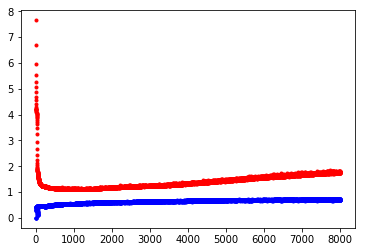

In [114]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['acc']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()